In [1]:
import requests
import urllib.request
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

from time import sleep
from random import randint

In [2]:
years = np.arange(2010,2021,1)

d = {}

for year in years:
    url = 'https://www.worldsurfleague.com/athletes/tour/mqs?year=' + str(year)
    page = urllib.request.urlopen(url)
    soup = BeautifulSoup(page, 'lxml')
    right_table = soup.find('table', class_='tableType-athlete hasGroups')
    
    countries = right_table.findAll('span', class_='athlete-country-name')
    Country = []
    for country in countries:
        Country.append(country.text)
    df = pd.DataFrame()
    df['Country'] = Country
    df = df.iloc[:35]
    qs = pd.DataFrame(df['Country'].value_counts())
    qs = qs.T
    qs = qs.rename(index={'Country': (year)})
    d['qs{0}'.format(year)] = qs
        

In [3]:
#d

In [4]:
frame = [d['qs2010'],d['qs2011'],d['qs2012'],d['qs2013'],d['qs2014'],d['qs2015'],d['qs2016'],d['qs2017'],
         d['qs2018'],d['qs2019'],d['qs2020']]


In [5]:
df = pd.concat(frame)
df = df.fillna(0)
df

,Australia,Brazil,United States,Hawaii,France,Peru,Japan,Portugal,Morocco,Italy,Uruguay,Indonesia,South Africa,Ireland,Spain,New Zealand,Canary Islands,Costa Rica
2010,9,7,4,3,3,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2011,12,8,7,3,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2012,11,8,7,3,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
2013,13,8,5,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0
2014,9,8,4,3,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,1.0
2015,10,10,5,3,3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2016,9,9,6,3,4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2017,3,15,5,3,1,0.0,2.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0
2018,8,11,5,3,2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2019,12,9,3,2,3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0


In [7]:
import matplotlib.pyplot as plt

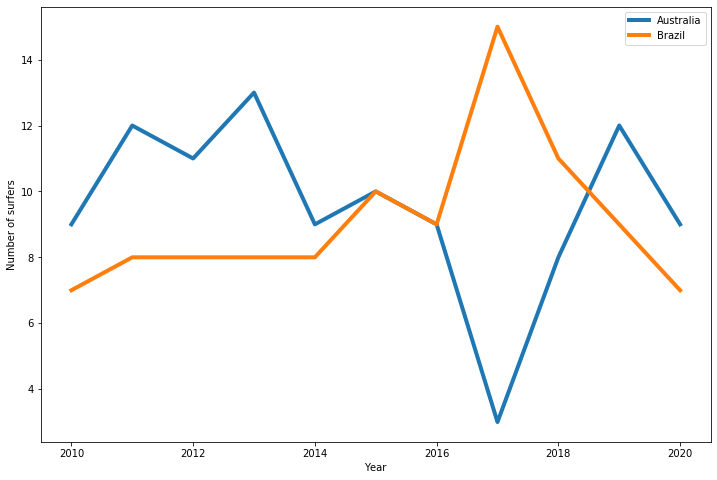

In [8]:
df['Australia'].plot(legend=True, figsize=(12,8), lw=4)
df['Brazil'].plot(legend=True, lw=4)

plt.xlabel('Year')
plt.ylabel('Number of surfers')

plt.savefig('mqs.jpeg')

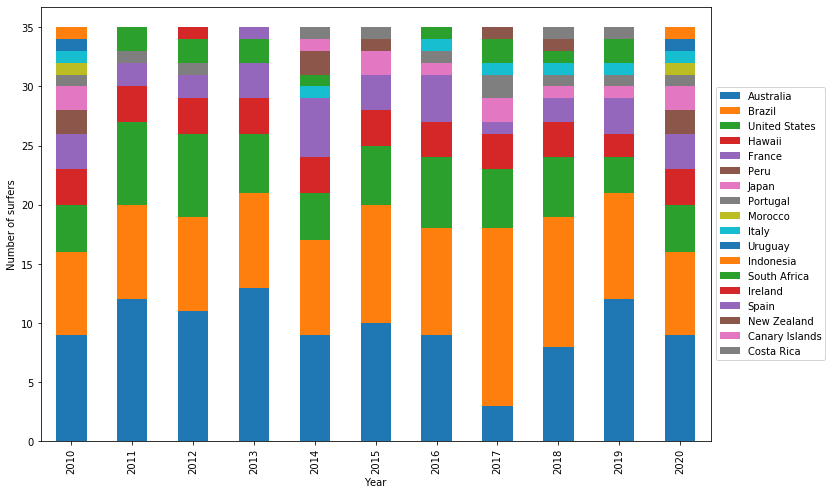

In [10]:
df.plot(kind='bar',stacked=True, figsize=(12,8)).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

plt.xlabel('Year')
plt.ylabel('Number of surfers')

plt.savefig('mqs1.jpeg')